In [1]:
from ast import literal_eval
import glob2
import pandas as pd
import numpy as np
import json
import csv
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
bottom = pd.read_csv('label_bottom.csv', encoding='utf-8')
bottom

,image_id,image_name,image_height,image_width,bottom_cate,bottom_len,bottom_mat
0,1231679,"1-(9)-008-275-2,526-14,877-FLY_349_01.jpg",800,800,스커트,미디,우븐
1,1231680,"1-(9)-008-275-2,526-14,877-FLY_349_02.jpg",800,800,스커트,미디,우븐
2,1231682,"1-(9)-008-275-2,526-14,877-FLY_349_04.jpg",800,800,스커트,미디,우븐
3,1231688,"1-(9)-008-275-2,526-14,877-FLY_349_11_3.jpg",800,800,스커트,미디,우븐
4,1231690,"1-(9)-008-275-2,526-14,877-FLY_349_11_5.jpg",800,800,스커트,미디,우븐
...,...,...,...,...,...,...,...
33611,1273100,20201118_000308_수면바지-160325984281523200_119473...,1066,800,조거팬츠,발목,벨벳
33612,1273101,20201118_000308_수면바지-160325984388528100_523840...,1066,800,조거팬츠,발목,벨벳
33613,1273102,20201118_000308_수면바지-160325984498945300_194657...,1066,800,조거팬츠,발목,벨벳
33614,1273115,20201118_000317_골덴 배기바지 S-XL (5color)-16031919...,1066,800,팬츠,발목,코듀로이


In [3]:
df_bottom = pd.get_dummies(data = bottom, columns = ['bottom_cate', 'bottom_len', 'bottom_mat'])
df_bottom

,image_id,image_name,image_height,image_width,bottom_cate_래깅스,bottom_cate_스커트,bottom_cate_조거팬츠,bottom_cate_청바지,bottom_cate_팬츠,bottom_len_니렝스,...,bottom_mat_시폰,bottom_mat_실크,bottom_mat_우븐,bottom_mat_울/캐시미어,bottom_mat_자카드,bottom_mat_저지,bottom_mat_코듀로이,bottom_mat_트위드,bottom_mat_플리스,bottom_mat_헤어 니트
0,1231679,"1-(9)-008-275-2,526-14,877-FLY_349_01.jpg",800,800,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1231680,"1-(9)-008-275-2,526-14,877-FLY_349_02.jpg",800,800,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1231682,"1-(9)-008-275-2,526-14,877-FLY_349_04.jpg",800,800,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1231688,"1-(9)-008-275-2,526-14,877-FLY_349_11_3.jpg",800,800,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1231690,"1-(9)-008-275-2,526-14,877-FLY_349_11_5.jpg",800,800,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33611,1273100,20201118_000308_수면바지-160325984281523200_119473...,1066,800,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33612,1273101,20201118_000308_수면바지-160325984388528100_523840...,1066,800,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33613,1273102,20201118_000308_수면바지-160325984498945300_194657...,1066,800,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33614,1273115,20201118_000317_골덴 배기바지 S-XL (5color)-16031919...,1066,800,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df_bottom.columns

Index(['image_id', 'image_name', 'image_height', 'image_width',
       'bottom_cate_래깅스', 'bottom_cate_스커트', 'bottom_cate_조거팬츠',
       'bottom_cate_청바지', 'bottom_cate_팬츠', 'bottom_len_니렝스', 'bottom_len_맥시',
       'bottom_len_미니', 'bottom_len_미디', 'bottom_len_발목', 'bottom_mat_가죽',
       'bottom_mat_네오프렌', 'bottom_mat_니트', 'bottom_mat_데님', 'bottom_mat_레이스',
       'bottom_mat_린넨', 'bottom_mat_메시', 'bottom_mat_벨벳', 'bottom_mat_비닐/PVC',
       'bottom_mat_스웨이드', 'bottom_mat_스판덱스', 'bottom_mat_시퀸/글리터',
       'bottom_mat_시폰', 'bottom_mat_실크', 'bottom_mat_우븐', 'bottom_mat_울/캐시미어',
       'bottom_mat_자카드', 'bottom_mat_저지', 'bottom_mat_코듀로이', 'bottom_mat_트위드',
       'bottom_mat_플리스', 'bottom_mat_헤어 니트'],
      dtype='object')

In [5]:
from keras.preprocessing import image
from tqdm import tqdm

In [6]:
train_image = []
for i in tqdm(range(300, 800)):
    img = image.load_img('C:/img/'+df_bottom['image_name'][i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 500/500 [00:05<00:00, 87.30it/s] 


In [7]:
print(len(train_image))

500


In [8]:
X = np.array(train_image)
X.shape

(500, 400, 400, 3)

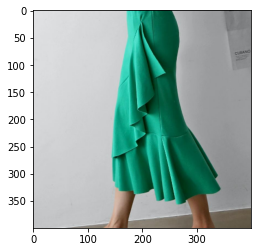

In [9]:
plt.imshow(X[1])

In [12]:
y = np.array(df_bottom.drop(['image_id', 'image_name', 'image_height', 'image_width'], axis=1)[300:800])
len(y)

500

In [13]:
reconstructed_model = keras.models.load_model("model_bottom.h5")

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [15]:
print(X_train.shape)
print(y_train.shape)

(450, 400, 400, 3)
(450, 32)


In [14]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))

In [21]:
reconstructed_model.summary()

NameError: name 'reconstructed_model' is not defined

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
reconstructed_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
8/8 [==============================] - 151s 16s/step - loss: 0.2390 - accuracy: 0.0956 - val_loss: 0.2177 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 138s 17s/step - loss: 0.2321 - accuracy: 0.1156 - val_loss: 0.2151 - val_accuracy: 0.0000e+00

In [21]:
model.save('model_bottom.h5')
print('saved')

saved


In [20]:
def count_correct_result(list, result):
    answer = 0
    list_answer = []
    style_list = list[0:5].tolist()
    len_list = list[5:10].tolist()
    mat_list = list[10: 32].tolist()
    list_answer.append(style_list.index(max(style_list)))
    list_answer.append(len_list.index(max(len_list)) + 5)
    list_answer.append(mat_list.index(max(mat_list)) + 10)
    for i in result:
        if i in list_answer:
            answer += 1
    return answer

In [21]:
def real_answer(image_name):
    count = -4
    answer = []
    temp_df = df_bottom[df_bottom['image_name'] == image_name]
    for i in temp_df.columns:
        if count >= 0 and int(temp_df[i].values[0]) == 1:
            answer.append(count)
        count += 1
    return answer

In [22]:
from random import randint
import os.path
from tqdm import tqdm

In [26]:
reconstructed_model2 = keras.models.load_model("model_bottom.h5")

In [ ]:
img = image.load_img('C:/img/(116)IMG_1.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
print(reconstructed_model.predict(img.reshape(1,400,400,3))[0])
count_correct_result(reconstructed_model.predict(img.reshape(1,400,400,3))[0], real_answer("(116)IMG_1.jpg"))

In [28]:
answer = 0
sum = 0
for i in tqdm(range(0, 300)):
    try:
        name = df_bottom['image_name'][randint(1, 33616)]
        if os.path.isfile('C:/img/' + name):
            img = image.load_img('C:/img/' + name,target_size=(400,400,3))
        img = image.img_to_array(img)
        img = img/255
        answer += count_correct_result(reconstructed_model2.predict(img.reshape(1,400,400,3))[0], real_answer(name))
        sum += 3
    except:
        continue
print("Accuracy = " + str(answer / sum))

100%|██████████| 300/300 [00:31<00:00,  9.54it/s]

Accuracy = 0.6666666666666666
